# Start getting familiar with working with data frames

First, let's look at property prices by borough

In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

sales_df = pd.read_csv("../datasets/nyc-rolling-sales.csv")
sales_df.head(5)


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [17]:
sales_df = sales_df.rename(columns={'SALE PRICE': 'SALEPRICE'})
sales_df = sales_df[sales_df.SALEPRICE != ' -  ']
sales_df['SALEPRICE'].value_counts().head(10)

0         10228
10          766
450000      427
550000      416
650000      414
600000      409
700000      382
400000      378
750000      377
300000      351
Name: SALEPRICE, dtype: int64

### Zero values aren't helpful so let's drop them

In [18]:
sales_df = sales_df[sales_df.SALEPRICE != '0']
sales_df = sales_df[sales_df.SALEPRICE != '10']
sales_df = sales_df[sales_df.SALEPRICE != '1']
sales_df['SALEPRICE'].value_counts()

450000     427
550000     416
650000     414
600000     409
700000     382
          ... 
3005000      1
885775       1
991775       1
1097673      1
1749879      1
Name: SALEPRICE, Length: 10004, dtype: int64

In [19]:
# need these values to be numeric
sales_df['SALEPRICE'] = pd.to_numeric(sales_df['SALEPRICE'])
prices = sales_df['SALEPRICE']
prices.value_counts()

450000     427
550000     416
650000     414
600000     409
700000     382
          ... 
2064706      1
643400       1
188750       1
856400       1
724994       1
Name: SALEPRICE, Length: 10004, dtype: int64

In [7]:
prices.std()


12422042.14610187

In [8]:
prices.var()

154307131079531.12

### The boroughs as ints isn't very informative for this example

In [20]:
sales_df['BOROUGH'][sales_df['BOROUGH'] == 1] = 'Manhattan'
sales_df['BOROUGH'][sales_df['BOROUGH'] == 2] = 'Bronx'
sales_df['BOROUGH'][sales_df['BOROUGH'] == 3] = 'Brooklyn'
sales_df['BOROUGH'][sales_df['BOROUGH'] == 4] = 'Queens'
sales_df['BOROUGH'][sales_df['BOROUGH'] == 5] = 'Staten Island'

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doi

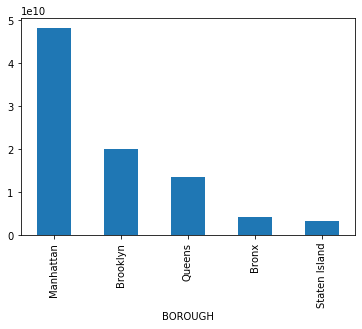

In [10]:
# visualize prices per borough
prices_and_borough = sales_df[['BOROUGH', 'SALEPRICE']]
cost_per_borough = prices_and_borough.groupby('BOROUGH').SALEPRICE.sum().sort_values(ascending=False)

cost_per_borough.plot(kind='bar')

In [21]:
df = pd.read_csv("party_in_nyc.csv")
df.head(10)

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
5,2015-12-31 00:08:05,2015-12-31 01:59:12,Residential Building/House,10467.0,BRONX,BRONX,40.858748,-73.865625
6,2015-12-31 00:11:40,2015-12-31 06:24:00,Residential Building/House,11230.0,BROOKLYN,BROOKLYN,40.617005,-73.956920
7,2015-12-31 00:12:13,2015-12-31 00:38:09,Residential Building/House,11215.0,BROOKLYN,BROOKLYN,40.665051,-73.981278
8,2015-12-31 00:12:37,2015-12-31 05:03:39,Residential Building/House,10463.0,BRONX,BRONX,40.875895,-73.912471
9,2015-12-31 00:14:13,2015-12-31 06:25:40,Store/Commercial,11372.0,JACKSON HEIGHTS,QUEENS,40.755584,-73.885201


In [22]:
party_per_borough = df['Borough'].value_counts()
party_per_borough

BROOKLYN         68905
MANHATTAN        64172
BRONX            47672
QUEENS           38274
STATEN ISLAND     5411
Unspecified        980
Name: Borough, dtype: int64

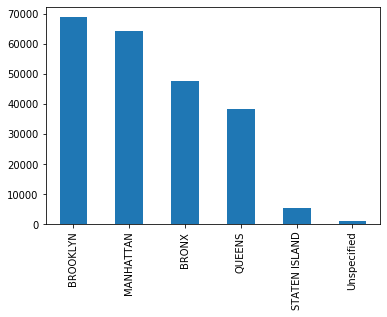

In [13]:
party_per_borough.plot(kind='bar')

### play around with correlation 

-0.4217692145080202

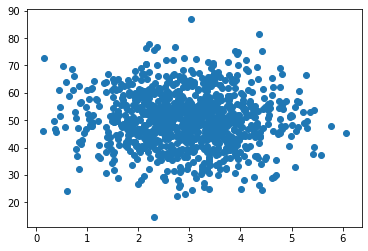

In [23]:
# first play around with covariance and correlation
%matplotlib inline

from pylab import *

def de_mean(x):
    xmean = mean(x)
    return [xi -xmean for xi in x]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

scatter(pageSpeeds, purchaseAmount)

covariance(pageSpeeds, purchaseAmount)

-11.682799689798014

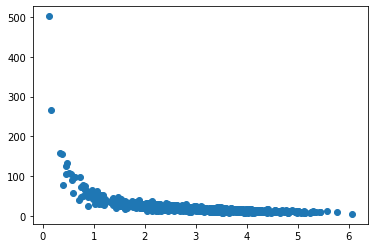

In [24]:
# force a relationship to see plot change
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

covariance (pageSpeeds, purchaseAmount)

In [5]:
def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) / stddevx / stddevy  #with real data must check for zeros

correlation(pageSpeeds, purchaseAmount)

-0.712189753066953

In [6]:
np.corrcoef(pageSpeeds, purchaseAmount)

array([[ 1.        , -0.71147756],
       [-0.71147756,  1.        ]])

In [7]:
np.cov(pageSpeeds, purchaseAmount)

array([[  0.94206395,  -7.10842713],
       [ -7.10842713, 105.96055566]])